In [1]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [2]:
%reset -f
import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
from importlib import reload

reload(sparg)
warnings.simplefilter("always")

In [3]:
ts = tskit.load("slim/slim_0.25rep1sigma.trees")

for sd in range(4):
    np.random.seed(sd)
    keep_nodes = list(np.random.choice(ts.samples(), 100, replace=False))
    ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
    ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
    ts_chopped = ts_filtered.decapitate(10000)
    ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

    outfile = open("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_" + str(sd) + "_chopped_10000.txt", "w")
    i = 0
    for bp in ts_chopped_attached.breakpoints():
        if i < 50:
            if i > 0:
                if i in range(0,150,10):
                    print(sd, i)
                ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
                ts_short_sim, maps_short_sim = sparg.remove_uninformative_nodes(ts=ts_short)
                ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
                ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
                dispersal_rate, FI, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts_short_attached, n_r = 'Sample', fisher_info=True)
                dispersal_rate_rank, FI_rank, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts_short_attached, n_r = 'Rank', fisher_info=True)

                outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(FI) + " " + str(dispersal_rate_rank[0][0]) + " " + str(dispersal_rate_rank[1][1]) + " " + str(FI_rank) + " " + str(len(paths)) + "\n")
                #print("Number of trees:", ts_short_attached.num_trees)
                #print("Sequence length:", int(bp))
                #print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
                #print("Rank of the Matrix:", np.linalg.matrix_rank(cov_mat))
                #print("Number of Paths:", cov_mat.shape)
                #if ts_short_attached.num_trees == 2:
                #    viz.D3ARG(ts=ts_short_attached).draw()
        else:
            break
        i += 1
    outfile.close()

0 10
0 20
0 30
0 40
1 10
1 20
1 30
1 40
2 10
2 20
2 30
2 40
3 10
3 20
3 30
3 40


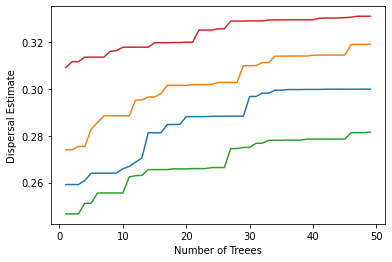

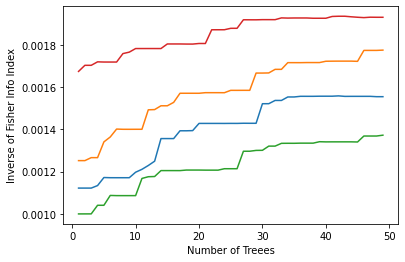

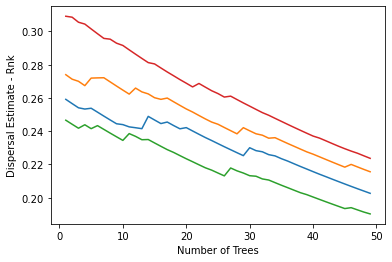

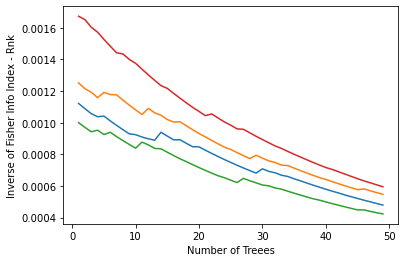

In [5]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_0_chopped_10000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])

dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_1_chopped_10000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])

dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_2_chopped_10000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])

dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_3_chopped_10000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.xlabel("Number of Treees")
plt.ylabel("Dispersal Estimate")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,4])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,4])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,4])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,4])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index")
plt.show()

plt.plot(dispersal_1[:,0], dispersal_1[:,5])
plt.plot(dispersal_2[:,0], dispersal_2[:,5])
plt.plot(dispersal_3[:,0], dispersal_3[:,5])
plt.plot(dispersal_4[:,0], dispersal_4[:,5])
plt.xlabel("Number of Trees")
plt.ylabel("Dispersal Estimate - Rnk")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,7])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,7])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,7])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,7])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index - Rnk")
plt.show()



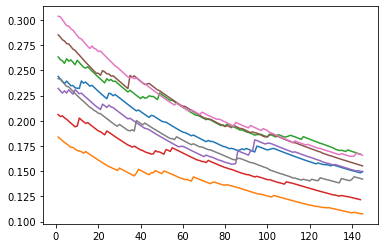

In [11]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_0_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.show()

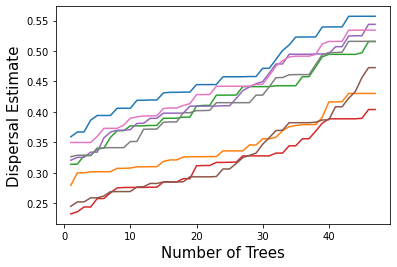

In [9]:
dispersal_1 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_4_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.xlabel("Number of Trees", fontsize = 15)
plt.ylabel("Dispersal Estimate", fontsize = 15)
plt.show()


In [7]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")

np.random.seed(3)
keep_nodes = list(np.random.choice(ts.samples(), 5, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
ts_chopped = ts_filtered.decapitate(4000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

outfile = open("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt", "w")
i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(len(paths)) + "\n")
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #if ts_short_attached.num_trees == 2:
            #    viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1
outfile.close()

AttributeError: module 'sparg' has no attribute 'new_remove_useless_nodes'

# Minimal Covariance Matrix

In [8]:
tables = tskit.TableCollection(sequence_length=1e3)

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 2)  # Node 2
node_table.add_row(time=1)  # Node 3
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 4
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 5
node_table.add_row(time=3)  # Node 6
node_table.add_row(time=4)  # Node 7

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=3, child=0)
edge_table.add_row(left=0, right=1e3, parent=3, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=2)
edge_table.add_row(left=0, right=500, parent=4, child=3)
edge_table.add_row(left=500, right=1e3, parent=5, child=3)
edge_table.add_row(left=500, right=1e3, parent=6, child=5)
edge_table.add_row(left=0, right=500, parent=7, child=4)
edge_table.add_row(left=0, right=500, parent=7, child=6)

individuals_table = tables.individuals 
individuals_table.add_row(flags = 0)
individuals_table.add_row(flags = 0)
individuals_table.add_row(flags = 0)

tables.sort()


ts = tables.tree_sequence()
viz.D3ARG(ts=ts).draw(edge_type="ortho")
print(ts.tables.individuals)

/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


╔══╤═════╤════════╤═══════╤════════╗
║id│flags│location│parents│metadata║
╠══╪═════╪════════╪═══════╪════════╣
║0 │    0│        │       │        ║
║1 │    0│        │       │        ║
║2 │    0│        │       │        ║
╚══╧═════╧════════╧═══════╧════════╝



In [9]:
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts)
cov_mat, paths = sparg.calc_covariance_matrix(ts)
print(cov_mat, paths)
print(cov_min_mat, min_paths )

[[4. 3. 0. 2. 1.]
 [3. 4. 0. 1. 2.]
 [0. 0. 4. 1. 1.]
 [2. 1. 1. 4. 3.]
 [1. 2. 1. 3. 4.]] [[0, 3, 4, 7], [1, 3, 4, 7], [2, 6, 7], [0, 3, 5, 6, 7], [1, 3, 5, 6, 7]]
[[4. 1. 0. 2.]
 [1. 4. 1. 3.]
 [0. 1. 4. 1.]
 [2. 3. 1. 4.]] [[0, 3, 4, 7], [1, 3, 5, 6, 7], [2, 6, 7], [0, 3, 5, 6, 7]]


In [10]:
node_locations = {0:[0], 1:[1], 2:[2]}

sigma, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = False, locations_of_individuals=node_locations)
sigma_min, min_cov_mat, min_paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = True,  locations_of_individuals=node_locations)

In [11]:
print(sigma, sigma_min)

[[0.30952381]] [[0.30952381]]


In [31]:
for rep in range(20): 
    print(rep)
    ts = msprime.sim_ancestry(samples=1, recombination_rate=1e-6, sequence_length=1000, population_size=10_000, record_full_arg=True, random_seed = rep+1)    
    ts_chopped = ts.decapitate(5000)
    ts_short_sim, maps_short_sim = sparg.remove_uninformative_nodes(ts=ts_chopped)
    ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
    ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
    
    cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_short_attached)
    cov_mat, paths = sparg.calc_covariance_matrix(ts_short_attached)
    
    if len(cov_min_mat) != np.linalg.matrix_rank(cov_min_mat):
        ts_new = ts_short_attached
    
    print(len(cov_min_mat), len(cov_mat), np.linalg.matrix_rank(cov_min_mat), np.linalg.matrix_rank(cov_mat))
    
    #node_locations = {i:[np.random.uniform(0,100)] for i in range(100)}
    #sigma, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = False, locations_of_individuals=node_locations)
    #sigma_min, min_cov_mat, min_paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = True,  locations_of_individuals=node_locations)
    
    #print(sigma, sigma_min)                                                                              

0
3 3 3 3
1
17 21 16 16
2
16 21 12 12
3
12 16 11 11
4
10 12 10 10
5
8 8 7 7
6
11 14 9 9
7
2 2 2 2
8
14 16 13 13
9
16 20 13 13
10
13 17 11 11
11
12 13 9 9
12
7 8 7 7
13
14 27 12 12
14
7 10 6 6
15
14 40 12 12
16
17 61 17 17
17
13 15 11 11
18
12 19 9 9
19
10 11 9 9


In [32]:
np.random.uniform(0,100)


41.7022004702574

In [33]:
ts_new.draw_svg()
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_new)
cov_mat, paths = sparg.calc_covariance_matrix(ts_new)
print(len(cov_min_mat), len(cov_mat), np.linalg.matrix_rank(cov_min_mat), np.linalg.matrix_rank(cov_mat))


10 11 9 9


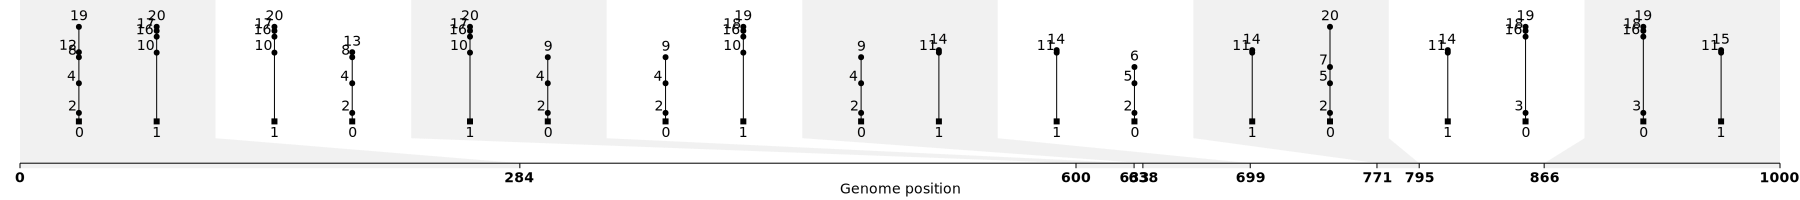

In [34]:
ts_new.draw_svg()

In [35]:
ts_new.tables.edges

id,left,right,parent,child,metadata
0,0,795,2,0,
1,795,1000,3,0,
2,0,699,4,2,
3,699,795,5,2,
4,699,771,6,5,
5,771,795,7,5,
6,0,600,8,4,
7,600,699,9,4,
8,0,638,10,1,
9,638,1000,11,1,


In [36]:
ts_new.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,0,0.00000000,
2,131072,0,-1,443.96869070,
3,131072,0,-1,443.96869070,
4,131072,0,-1,1990.34663844,
5,131072,0,-1,1990.34663844,
6,131072,0,-1,2838.01027670,
7,131072,0,-1,2838.01027670,
8,131072,0,-1,3350.61144254,
9,131072,0,-1,3350.61144254,


In [37]:
min_paths

[[0, 2, 4, 8, 12, 19],
 [1, 10, 16, 18, 19],
 [0, 3, 16, 17, 20],
 [1, 11, 14],
 [0, 2, 5, 6],
 [0, 2, 4, 9],
 [0, 2, 5, 7, 20],
 [0, 2, 4, 8, 13],
 [1, 11, 15],
 [0, 3, 16, 18, 19]]

In [38]:
paths

[[0, 2, 4, 8, 12, 19],
 [1, 10, 16, 17, 20],
 [0, 3, 16, 17, 20],
 [1, 11, 14],
 [0, 2, 5, 6],
 [0, 2, 4, 9],
 [0, 2, 5, 7, 20],
 [0, 2, 4, 8, 13],
 [1, 11, 15],
 [0, 3, 16, 18, 19],
 [1, 10, 16, 18, 19]]